In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('data.csv',  encoding="shift-jis", skiprows=6)
df.drop(df.iloc[:, :3], axis=1, inplace=True)
df.drop(['/項目', '注釈', '注釈.1', '注釈.2', '注釈.3','注釈.4', '注釈.5', '注釈.6', '注釈.7', '注釈.8', '注釈.9', '注釈.10','注釈.11','注釈.12','注釈.13', '注釈.14'], axis=1, inplace=True)
df

,地域,A1101_総人口【人】,A1301_15歳未満人口【人】,A1302_15〜64歳人口【人】,A1303_65歳以上人口【人】,E1101_幼稚園数【園】,E2101_小学校数【校】,E3101_中学校数【校】,E4101_高等学校数【校】,I5101_病院数【施設】,#A05101_人口増減率【％】,#A05302_転入率（日本人移動者）【％】,#A05303_転出率（日本人移動者）【％】,#F01201_第1次産業就業者比率【％】,#F01202_第2次産業就業者比率【％】,#F01203_第3次産業就業者比率【％】
0,北海道 札幌市 中央区,"237,627","23,997","160,339","50,536",15,18,11,8,37,7.92,9.02,7.63,0.26,8.34,78.45
1,北海道 札幌市 北区,"285,321","32,916","178,950","68,960",17,31,16,9,24,2.35,5.65,5.19,0.54,15.91,74.77
2,北海道 札幌市 東区,"261,912","30,716","168,302","61,448",13,27,15,7,25,2.36,6.10,5.53,0.47,15.90,74.51
3,北海道 札幌市 白石区,"209,584","23,590","136,879","47,879",9,20,8,3,21,2.61,6.67,6.45,0.33,15.99,72.35
4,北海道 札幌市 豊平区,"218,652","23,865","142,751","51,458",15,22,11,6,15,3.08,7.37,6.98,0.34,11.03,77.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,沖縄県 久米島町,"7,755","1,218","4,475","2,052",6,6,2,1,1,-8.97,5.22,5.98,26.98,14.75,57.89
1892,沖縄県 八重瀬町,"29,066","5,315","18,012","5,610",4,4,2,3,1,8.94,5.91,4.46,8.81,16.26,72.32
1893,沖縄県 多良間村,"1,194",208,671,315,1,1,1,0,0,-3.01,4.52,7.54,41.55,13.37,44.93
1894,沖縄県 竹富町,"3,998",680,"2,469",798,3,11,9,0,0,3.60,14.53,13.56,14.93,4.79,70.62


In [19]:
df['A1101_総人口【人】'] = df['A1101_総人口【人】'].str.replace(',', '').astype(float)
df['A1301_15歳未満人口【人】'] = df['A1301_15歳未満人口【人】'].str.replace(',', '').astype(float)
df['A1302_15〜64歳人口【人】'] = df['A1302_15〜64歳人口【人】'].str.replace(',', '').astype(float)
df['A1303_65歳以上人口【人】'] = df['A1303_65歳以上人口【人】'].str.replace(',', '').astype(float)
df

,地域,A1101_総人口【人】,A1301_15歳未満人口【人】,A1302_15〜64歳人口【人】,A1303_65歳以上人口【人】,E1101_幼稚園数【園】,E2101_小学校数【校】,E3101_中学校数【校】,E4101_高等学校数【校】,I5101_病院数【施設】,#A05101_人口増減率【％】,#A05302_転入率（日本人移動者）【％】,#A05303_転出率（日本人移動者）【％】,#F01201_第1次産業就業者比率【％】,#F01202_第2次産業就業者比率【％】,#F01203_第3次産業就業者比率【％】
0,北海道 札幌市 中央区,237627.0,23997.0,160339.0,50536.0,15,18,11,8,37,7.92,9.02,7.63,0.26,8.34,78.45
1,北海道 札幌市 北区,285321.0,32916.0,178950.0,68960.0,17,31,16,9,24,2.35,5.65,5.19,0.54,15.91,74.77
2,北海道 札幌市 東区,261912.0,30716.0,168302.0,61448.0,13,27,15,7,25,2.36,6.10,5.53,0.47,15.90,74.51
3,北海道 札幌市 白石区,209584.0,23590.0,136879.0,47879.0,9,20,8,3,21,2.61,6.67,6.45,0.33,15.99,72.35
4,北海道 札幌市 豊平区,218652.0,23865.0,142751.0,51458.0,15,22,11,6,15,3.08,7.37,6.98,0.34,11.03,77.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,沖縄県 久米島町,7755.0,1218.0,4475.0,2052.0,6,6,2,1,1,-8.97,5.22,5.98,26.98,14.75,57.89
1892,沖縄県 八重瀬町,29066.0,5315.0,18012.0,5610.0,4,4,2,3,1,8.94,5.91,4.46,8.81,16.26,72.32
1893,沖縄県 多良間村,1194.0,208.0,671.0,315.0,1,1,1,0,0,-3.01,4.52,7.54,41.55,13.37,44.93
1894,沖縄県 竹富町,3998.0,680.0,2469.0,798.0,3,11,9,0,0,3.60,14.53,13.56,14.93,4.79,70.62


In [20]:
print('Are there missing value?', df.isnull().values.any())
print('How many?', df.isnull().values.sum())

Are there missing value? True
How many? 28


In [21]:
X = df.iloc[:, 1:].values
X

array([[2.37627e+05, 2.39970e+04, 1.60339e+05, ..., 2.60000e-01,
        8.34000e+00, 7.84500e+01],
       [2.85321e+05, 3.29160e+04, 1.78950e+05, ..., 5.40000e-01,
        1.59100e+01, 7.47700e+01],
       [2.61912e+05, 3.07160e+04, 1.68302e+05, ..., 4.70000e-01,
        1.59000e+01, 7.45100e+01],
       ...,
       [1.19400e+03, 2.08000e+02, 6.71000e+02, ..., 4.15500e+01,
        1.33700e+01, 4.49300e+01],
       [3.99800e+03, 6.80000e+02, 2.46900e+03, ..., 1.49300e+01,
        4.79000e+00, 7.06200e+01],
       [1.84300e+03, 2.31000e+02, 1.27100e+03, ..., 1.07800e+01,
        4.13100e+01, 4.78400e+01]])

In [22]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(X)
X= impute.transform(X)

In [25]:
array_sum = np.sum(X)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 1.75643547  1.28137445  1.991948   ... -0.96902163 -2.03640057
   1.7831581 ]
 [ 2.24749306  2.01313691  2.30061932 ... -0.94163924 -1.0988286
   1.38028011]
 [ 2.00647391  1.83263714  2.12401773 ... -0.94848483 -1.10006714
   1.3518159 ]
 ...
 [-0.67787954 -0.67040231 -0.6562135  ...  3.06890326 -1.41341682
  -1.88653494]
 [-0.64900954 -0.63167691 -0.62639291 ...  0.46562013 -2.47608095
   0.92594759]
 [-0.67119743 -0.66851527 -0.64626225 ...  0.05977396  2.04705355
  -1.56795479]]


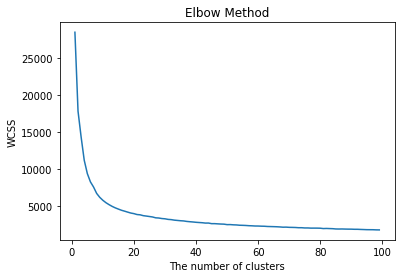

In [27]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 100):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.title('Elbow Method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 11, init = 'k-means++')
y_kmeans = kmeans.fit(X)

In [29]:
predictions = y_kmeans.labels_
df['Clusters'] = predictions
df

,地域,A1101_総人口【人】,A1301_15歳未満人口【人】,A1302_15〜64歳人口【人】,A1303_65歳以上人口【人】,E1101_幼稚園数【園】,E2101_小学校数【校】,E3101_中学校数【校】,E4101_高等学校数【校】,I5101_病院数【施設】,#A05101_人口増減率【％】,#A05302_転入率（日本人移動者）【％】,#A05303_転出率（日本人移動者）【％】,#F01201_第1次産業就業者比率【％】,#F01202_第2次産業就業者比率【％】,#F01203_第3次産業就業者比率【％】,Clusters
0,北海道 札幌市 中央区,237627.0,23997.0,160339.0,50536.0,15,18,11,8,37,7.92,9.02,7.63,0.26,8.34,78.45,9
1,北海道 札幌市 北区,285321.0,32916.0,178950.0,68960.0,17,31,16,9,24,2.35,5.65,5.19,0.54,15.91,74.77,9
2,北海道 札幌市 東区,261912.0,30716.0,168302.0,61448.0,13,27,15,7,25,2.36,6.10,5.53,0.47,15.90,74.51,9
3,北海道 札幌市 白石区,209584.0,23590.0,136879.0,47879.0,9,20,8,3,21,2.61,6.67,6.45,0.33,15.99,72.35,1
4,北海道 札幌市 豊平区,218652.0,23865.0,142751.0,51458.0,15,22,11,6,15,3.08,7.37,6.98,0.34,11.03,77.68,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,沖縄県 久米島町,7755.0,1218.0,4475.0,2052.0,6,6,2,1,1,-8.97,5.22,5.98,26.98,14.75,57.89,4
1892,沖縄県 八重瀬町,29066.0,5315.0,18012.0,5610.0,4,4,2,3,1,8.94,5.91,4.46,8.81,16.26,72.32,2
1893,沖縄県 多良間村,1194.0,208.0,671.0,315.0,1,1,1,0,0,-3.01,4.52,7.54,41.55,13.37,44.93,4
1894,沖縄県 竹富町,3998.0,680.0,2469.0,798.0,3,11,9,0,0,3.60,14.53,13.56,14.93,4.79,70.62,2


In [30]:
df.Clusters.value_counts()

2     368
0     362
10    361
8     252
1     183
4     165
9     121
3      56
5      21
6       6
7       1
Name: Clusters, dtype: int64

In [18]:
y_kmeans.score(X)

-108596537241.47293

In [36]:
municipalities = df['地域'].to_list()
total_population=df['A1101_総人口【人】'].to_list(),
those_under_15=df['A1301_15歳未満人口【人】'].to_list(),
those_between_15_and_64=df['A1302_15〜64歳人口【人】'].to_list(),
those_over_65=df['A1303_65歳以上人口【人】'].to_list(),
kindergartens=df['E1101_幼稚園数【園】'].to_list(),
elementary_schools=df['E2101_小学校数【校】'].to_list(),
junior_high_schools=df['E3101_中学校数【校】'].to_list(),
high_schools=df['E4101_高等学校数【校】'].to_list(),
hospitals=df['I5101_病院数【施設】'].to_list(),
population_trends=df['#A05101_人口増減率【％】'].to_list(),
move_in_ratio=df['#A05302_転入率（日本人移動者）【％】'].to_list(),
move_out_ratio=df['#A05303_転出率（日本人移動者）【％】'].to_list(),
primary_industry_ratio=df['#F01201_第1次産業就業者比率【％】'].to_list(),
secondary_industry_ratio=df['#F01202_第2次産業就業者比率【％】'].to_list(),
tertiary_industry_ratio=df['#F01203_第3次産業就業者比率【％】'].to_list(),
cluster=df['Clusters'].to_list()

AttributeError: 'list' object has no attribute 'astype'

In [49]:
result_dict = {}
for i in range(len(municipalities)):
  result_dict[municipalities[i]] = [total_population[0][i],
                                    those_under_15[0][i], 
                                    those_between_15_and_64[0][i],
                                    those_over_65[0][i],
                                    kindergartens[0][i],
                                    elementary_schools[0][i],
                                    junior_high_schools[0][i],
                                    high_schools[0][i],
                                    hospitals[0][i],
                                    population_trends[0][i],
                                    move_in_ratio[0][i],
                                    move_out_ratio[0][i],
                                    primary_industry_ratio[0][i],
                                    secondary_industry_ratio[0][i],
                                    tertiary_industry_ratio[0][i],
                                    cluster[i]]


In [50]:
# import joblib

# joblib.dump(result_dict, './clustering_result.joblib', compress=True)

['./clustering_result.joblib']